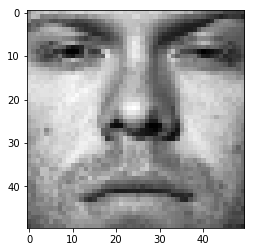

In [25]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

def show_img(data):
    plt.imshow(data, cmap = cm.Greys_r)
    plt.show()
show_img(train_data[10, :].reshape(50,50))

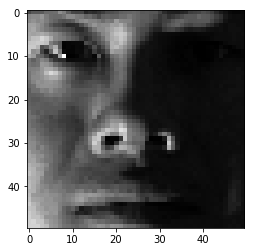

In [27]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
show_img(test_data[10, :].reshape(50,50))


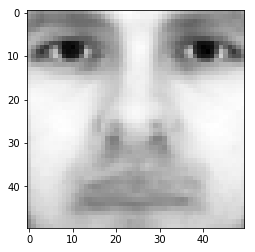

In [4]:
train_mean=train_data.mean(0)
show_img(train_mean.reshape(50,50))

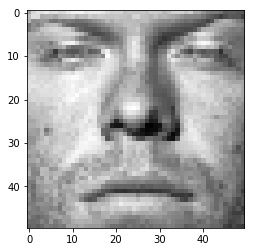

In [5]:
dist_train_data=np.array([xi-train_mean for xi in train_data])
show_img(dist_train_data[10, :].reshape(50,50))

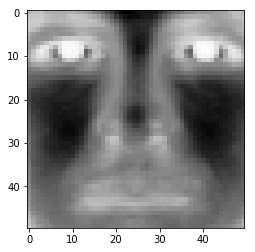

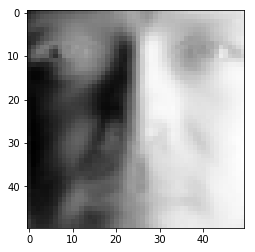

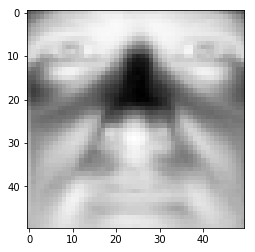

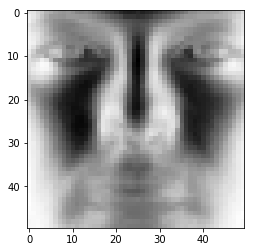

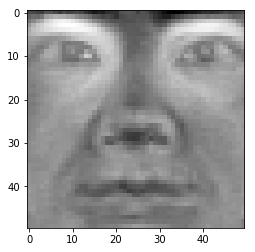

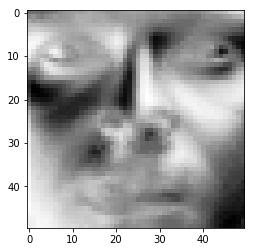

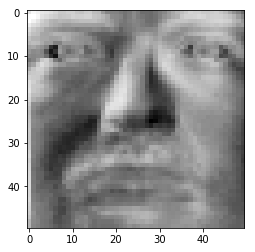

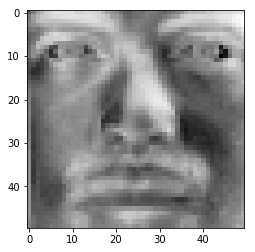

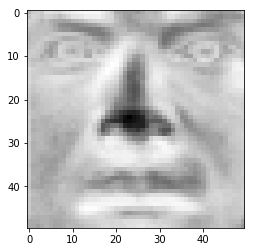

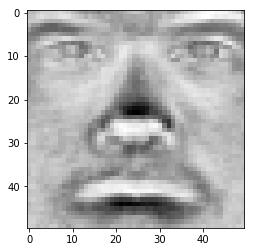

In [6]:
u,s,v=np.linalg.svd(train_data)
for eigenfaces in v[:10]:
    show_img(eigenfaces.reshape(50,50))

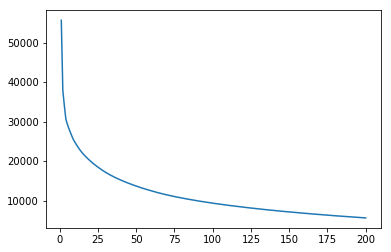

In [19]:
def rankRApprox(r):
    complete_s = np.zeros(train_data.shape,int)
    for i in range(len(s)):
        complete_s[i][i] = s[i]
    approx_data=np.dot(np.dot(u[:,:r],complete_s[:r,:r]),v[:r,:])
    return np.linalg.norm(train_data-approx_data)
ranks=[rankRApprox(i) for i in range(1,201)]
plt.plot(range(1,201),ranks)

In [28]:
def r_dimensional_feature_matrix(r):
    X = train_data
    X_test = test_data
    F = np.dot(X,np.transpose(v[:r,:]))
    F_test = np.dot(X_test,np.transpose(v[:r,:]))
    return F, F_test
    
F, F_test = r_dimensional_feature_matrix(100)
# print (F)
print (test_data.shape)
print (F_test.shape)

(100, 2500)
(100, 100)


In [16]:
list([0,1,2][:0])

[]